# Exploratory Data Analysis using sweetviz and dataprep.eda

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
#Install library using pip install and import it

import sweetviz

In [11]:
train_report=sweetviz.analyze([df_train,"train"],target_feat="SalePrice")

                                             |          | [  0%]   00:00 -> (? left)

In [12]:
train_report.show_html("train.html")

Report train.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [16]:
train_test_report=sweetviz.compare([df_train,"train"],[df_test,"test"],target_feat="SalePrice")

                                             |          | [  0%]   00:00 -> (? left)

In [17]:
train_test_report.show_html("compare.html")

Report compare.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [20]:
#features with no correlation to the dependent feature
df_train=df_train.drop(["Id","MSSubClass","Street","Utilities","LandSlope","BsmtFinSF2","LowQualFinSF",
               "BsmtHalfBath","MiscVal","MoSold","Condition2"],axis=1)
df_test=df_test.drop(["Id","MSSubClass","Street","Utilities","LandSlope","BsmtFinSF2","LowQualFinSF",
               "BsmtHalfBath","MiscVal","MoSold","Condition2"],axis=1)

In [22]:
#removing features with missing values more than or close to 50%:
df_train=df_train.drop(["FireplaceQu","PoolQC","Fence","MiscFeature","Alley"],axis=1)
df_test=df_test.drop(["FireplaceQu","PoolQC","Fence","MiscFeature","Alley"],axis=1)

In [24]:
#removing features with assosiation close to 1 with other independent features
df_train=df_train.drop(["GarageType","GarageFinish","GarageCars","GarageQual","GarageCond","3SsnPorch","HouseStyle"],axis=1)
df_test=df_test.drop(["GarageType","GarageFinish","GarageCars","GarageQual","GarageCond","3SsnPorch","HouseStyle"],axis=1)

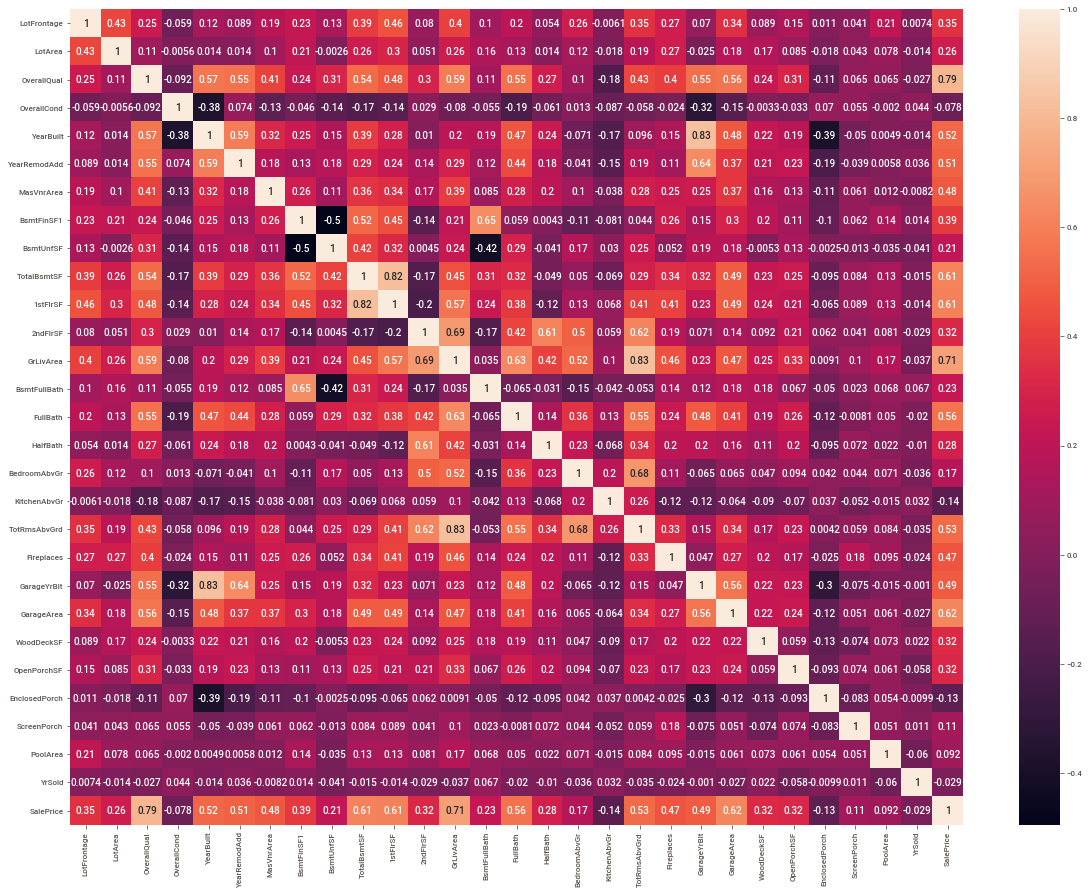

In [41]:
plt.figure(figsize=(20,15))
sns.heatmap(df_train.corr(),annot=True)

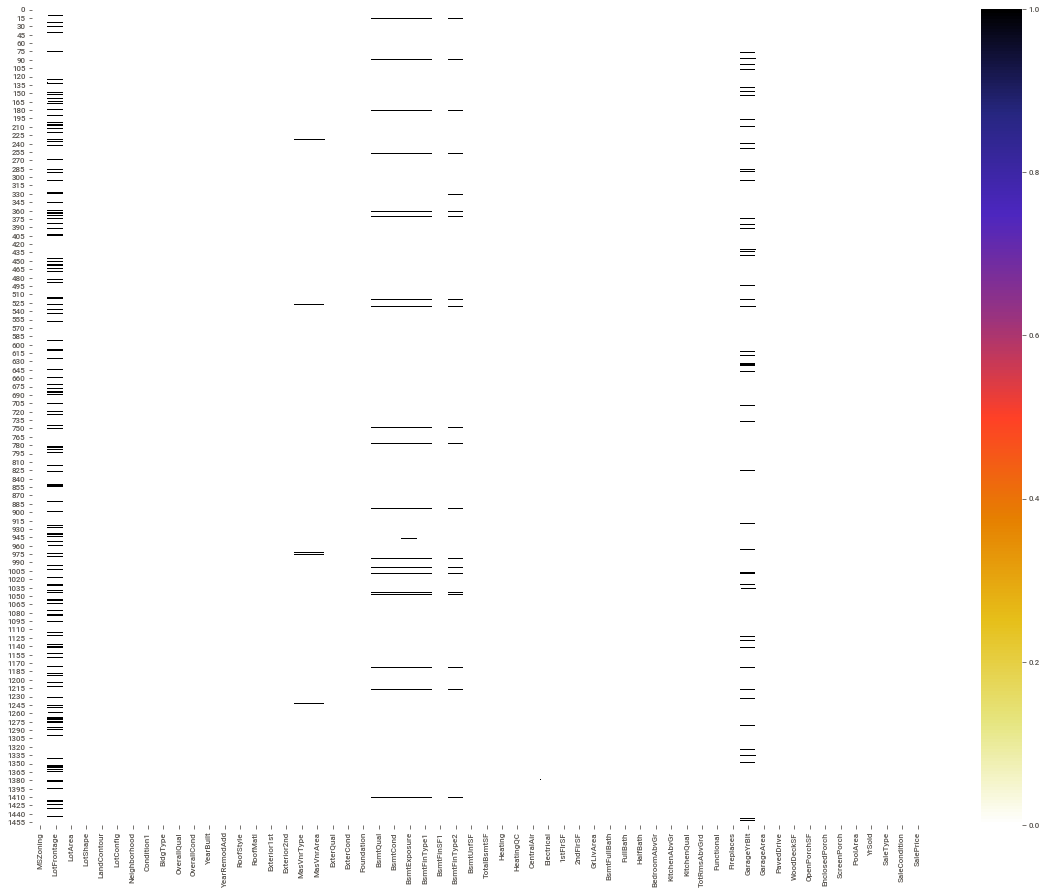

In [57]:
plt.figure(figsize=(20,15))
sns.heatmap(df_train.isna(),cmap="CMRmap_r")